In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [4]:
df = pd.read_csv('/content/winequality-red.csv');

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
train_df=df.sample(frac=0.75, random_state=4)

val_df=df.drop(train_df.index)

In [6]:
max_val=train_df.max(axis=0)
min_val=train_df.min(axis=0)

range=max_val - min_val
train_df=(train_df - min_val)/(range)

val_df=(val_df- min_val)/range

In [7]:
X_train = train_df.drop('quality',axis=1)
X_val = val_df.drop('quality',axis=1)
y_train = train_df['quality']
y_val = val_df['quality']

input_shape = [X_train.shape[1]]

input_shape

[11]

In [8]:
model = tf.keras.Sequential([

	tf.keras.layers.Dense(units=64, activation='relu',
						input_shape=input_shape),
	tf.keras.layers.Dense(units=64, activation='relu'),
	tf.keras.layers.Dense(units=1)
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4993 (19.50 KB)
Trainable params: 4993 (19.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
model.compile(optimizer='adam',  loss='mae')

In [10]:
losses = model.fit(X_train, y_train,

				validation_data=(X_val, y_val),

				batch_size=256,
				epochs=35, # total epoch

				)

Epoch 1/35
5/5 [==============================] - 2s 48ms/step - loss: 0.5341 - val_loss: 0.3962
Epoch 2/35
5/5 [==============================] - 0s 9ms/step - loss: 0.3194 - val_loss: 0.1953
Epoch 3/35
5/5 [==============================] - 0s 10ms/step - loss: 0.1715 - val_loss: 0.1562
Epoch 4/35
5/5 [==============================] - 0s 10ms/step - loss: 0.1675 - val_loss: 0.1783
Epoch 5/35
5/5 [==============================] - 0s 9ms/step - loss: 0.1736 - val_loss: 0.1557
Epoch 6/35
5/5 [==============================] - 0s 9ms/step - loss: 0.1505 - val_loss: 0.1428
Epoch 7/35
5/5 [==============================] - 0s 8ms/step - loss: 0.1432 - val_loss: 0.1376
Epoch 8/35
5/5 [==============================] - 0s 9ms/step - loss: 0.1377 - val_loss: 0.1315
Epoch 9/35
5/5 [==============================] - 0s 9ms/step - loss: 0.1302 - val_loss: 0.1240
Epoch 10/35
5/5 [==============================] - 0s 10ms/step - loss: 0.1221 - val_loss: 0.1175
Epoch 11/35
5/5 [==================

In [11]:
model.predict(X_val.iloc[0:3, :])

1/1 [==============================] - 0s 98ms/step


array([[0.4129853 ],
       [0.53558046],
       [0.39940524]], dtype=float32)

In [12]:
y_val.iloc[0:3]

0     0.4
9     0.4
12    0.4
Name: quality, dtype: float64

<Axes: >

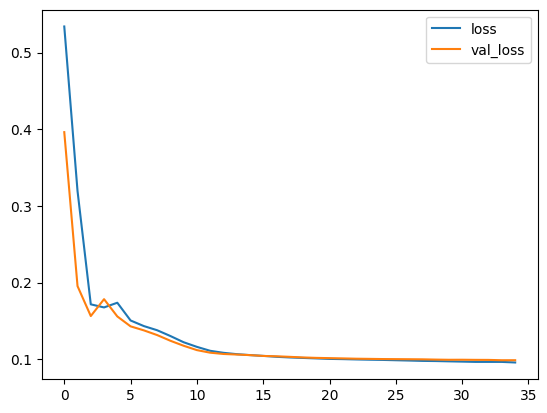

In [13]:
loss_df = pd.DataFrame(losses.history)

loss_df.loc[:,['loss','val_loss']].plot()